# 1. Vấn đề vs GAN loss function

* Trước hết ta có 1 bổ đề:
    * Xét hàm: $\large{\displaystyle f(x)=a*\log(x)+b*\log(1-x)}$. Tìm $x$ sao cho $f(x)$ cực đại
    * Xét $\large{\displaystyle f'(x)=\frac{a}{x}-\frac{b}{1-x}=0\Leftrightarrow x=\frac{a}{a+b}}$
    * Do đó $f(x)$ cực đại khi $\displaystyle x=x^*=\frac{a}{a+b}$
***
* Ta có GAN loss function vs $G$ (Generator) và $D $(Discriminator):
> $
\begin{equation}
    \begin{split}
        \large{\displaystyle\min_G\max_DV(D, G)~~}
        & \large{\displaystyle=\mathbb{E}_{x\in p_r(x)}[\log D(x)]+\mathbb{E}_{z\in p_z(z)}[\log(1-D(G(z)))]} \\
        & \large{\displaystyle=\mathbb{E}_{x\in p_r(x)}[\log D(x)]+\mathbb{E}_{x\in p_g(x)}[\log(1-D(G(x)))]} \\
        & \large{\displaystyle=\int_x{(p_r(x)\log D(x)+p_g(x)\log (1-D(x)))dx}}
    \end{split}
\end{equation}
$

| Các ký hiệu |                       Giải thích                       |
|:-----------:|:------------------------------------------------------:|
|     $G$     |                     Generator model                    |
|     $D$     |                   Discriminator model                  |
|     $x$     |                        Ảnh thật                        |
|   $p_r(x)$  |              Distribution sinh ra ảnh thật             |
|     $z$     |                          Noise                         |
|   $p_z(z)$  |               Distribution sinh ra noise               |
|   $p_g(x)$  | Distribution sinh ra ảnh fake (hay chính là Generator) |

* Trước tiên ta cần tìm $D$ để đạt $\max V(D,G)$ vs $G$ là hằng số. Áp dụng bổ đề trên, $V$ đạt max khi:
> $\large{\displaystyle D(x)=D^*(x)=\frac{p_r(x)}{p_r(x)+p_g(x)}}$
* Sau khi tìm đc $D(x)$, ta thay vào $V$ để tìm $\displaystyle\min_GV(D^*,G)$
> $
\begin{equation}
    \begin{split}
        \large{\displaystyle\min_GV(D^*,G)~}
        & \large{\displaystyle=\int_x{(p_r(x)\log D^*(x)+p_g(x)\log (1-D^*(x)))dx}} \\
        & \large{\displaystyle=\int_x{(p_r(x)\log\frac{p_r(x)}{p_r(x)+p_g(x)}+p_g(x)\log\frac{p_g(x)}{p_r(x)+p_g(x)})dx}}
    \end{split}
\end{equation}
$
* Để tính độ tương đồng giữa 2 distribution (giống nhau sẽ có gtri là 0), ta thường dùng **Jensen–Shannon divergence (JS)** và **Kullback–Leibler divergence (KL)**. **Jensen–Shannon divergence (JS)** là phiên bản đối xứng và smooth của **Kullback–Leibler divergence (KL)** $D(P\mid\mid Q)$:
    * $\large{\displaystyle D_{JS}~(P\mid\mid Q)=\frac{1}{2}D(P\mid\mid M)+\frac{1}{2}D(Q\mid\mid M)}~~$ với $\large{~~\displaystyle M=\frac{1}{2}(P+Q)}$
    * $\large{\displaystyle D_{KL}~(P\mid\mid Q)=\int_x{\log(\frac{dP}{dQ})dP}}$
* Ta có:
> $
\begin{equation}
    \begin{split}
        \large{\displaystyle D_{JS}(p_r\mid\mid p_g)~}
        & \large{\displaystyle=\frac{1}{2}D_{KL}(p_r\mid\mid\frac{p_r+p_g}{2})+\frac{1}{2}D_{KL}(p_g\mid\mid\frac{p_r+p_g}{2})} \\
        & \large{\displaystyle=\frac{1}{2}(\int_x{p_r(x)\log\frac{2p_r(x)}{p_r(x)+p_g(x)}dx})+\frac{1}{2}(\int_x{p_g(x)\log\frac{p_g(x)}{p_r(x)+p_g(x)}dx})} \\
        & \large{\displaystyle=\frac{1}{2}(\log 2+\int_x{p_r(x)\log\frac{p_r(x)}{p_r(x)+p_g(x)}dx})+\frac{1}{2}(\log 2+\int_x{p_g(x)\log\frac{p_g(x)}{p_r(x)+p_g(x)}dx})} \\
        & \large{\displaystyle=\frac{1}{2}(\log 4+\min_GV(D^*,G))} \\
    \end{split}
\end{equation}
$
$
\large{\displaystyle\Leftrightarrow\min_GV(D^*,G)=2D_{JS}(p_r\mid\mid p_g)-2\log 2} \\
\large{\displaystyle\Leftrightarrow\min_GV(D^*,G)=-2\log 2~~\text{khi}~~p_r=p_g~(D_{JS}=0)}
$ (hay 2 phân phối sinh ra ảnh thật và sinh ra ảnh fake giống nhau)
* Vậy khi $p_r$ và $p_g$ xa nhau (ko giống nhau) thì đạo hàm của $D_{JS}(p_r\mid\mid p_g)$ về 0 dẫn tới **vanishing gradient**
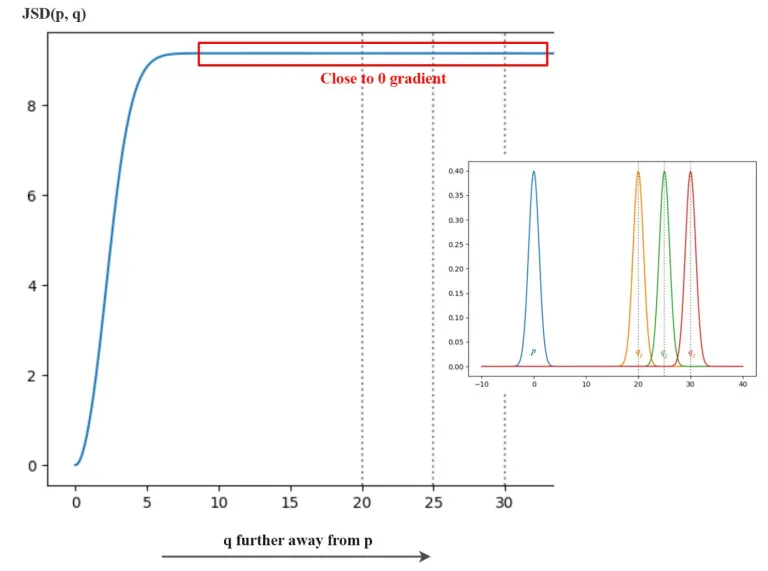
* Khi ms bắt đầu train, Generator sinh ra ảnh nhiễu nên Discriminator rất dễ học để phân biệt ảnh thật và giả, tuy nhiên $p_r$ và $p_g$ rất khác nhau dẫn tới vanishing gradient nên việc học của Generator không tốt
> $\Rightarrow$ loss function của GAN truyền thống giúp Discriminator học rất tốt nhưng Generator thì không

# 2. Least Squares Generative Adversarial Networks (LSGAN)
* LSGAN được thiết kế để train Generator tốt hơn. LSGAN được định nghĩa như sau:
> $
\begin{equation}
    \begin{split}
        \large{\displaystyle\min_DV_{LSGAN}(D)~}
        & \large{\displaystyle=\frac{1}{2}\mathbb{E}_{x\in p_{data}(x)}[(D(x)-b)^2]+\frac{1}{2}\mathbb{E}_{z\in p_{z}(z)}[(D(G(z))-a)^2]~~~~~(1)} \\
        \large{\displaystyle\min_DV_{LSGAN}(G)~}
        & \large{\displaystyle=\frac{1}{2}\mathbb{E}_{z\in p_z(z)}[(D(G(z))-c)^2] \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad(2)}
    \end{split}
\end{equation}
$

| Các ký hiệu |                      Giải thích                      |
|:-----------:|:----------------------------------------------------:|
|      x      |                    Dataset ban đầu                   |
|      a      |   Target label của ảnh sinh ra từ Generator (G(z))   |
|      b      | Target label của dataset (x) khi train Discriminator |
|      c      |       Target label của G(z) khi train Generator      |

* Do $\displaystyle\min_GV_{LSGAN}(G)$ ko phụ thuộc vào $D$ nên (2) có thể viết lại thành:
> $\large{\displaystyle\min_GV_{LSGAN}(G)=\frac{1}{2}\mathbb{E}_{z\in p_{data}(x)}[(D(x)-c)^2]+\frac{1}{2}\mathbb{E}_{z\in p_z(z)}[(D(G(z))-c)^2]~~~~~(3)}$
* Từ (1) ta thấy $\displaystyle\min_DV_{LSGAN}(D)$ nhỏ nhất khi:
> $\large{\displaystyle D=D^*(c)=\frac{bp_{data}+ap_g(x)}{p_{data}(x)+p_g(x)}~~~~~(4)}$
* Thay (4) vào (3) vs $b-c=1$ và $b-a=2$, ta đc:
    > $
\begin{equation}
    \begin{split}
        \large{\displaystyle\min_GV_{LSGAN}(G)~}
        & \large{\displaystyle=\int_\chi{\frac{(2p_g(x)-(p_d(x)+p_g(x)))^2}{p_d(x)+p_g(x)}}dx} \\
        & \large{\displaystyle=\chi_{Pearson}^2(p_d+p_g\mid\mid 2p_g)}
    \end{split}
\end{equation}
$

    > Trong đó $\displaystyle\chi_{Pearson}^2$ là **Pearson $\mathbf{\chi^2}$ divergence**
* Để $b-c=1$ và $b-a=2$, ta chọn $a=-1,~b=1,~c=0$, LSGAN đc viết lại thành:
> $
\begin{equation}
    \begin{split}
        \large{\displaystyle\min_DV_{LSGAN}(D)~}
        & \large{\displaystyle=\frac{1}{2}\mathbb{E}_{x\in p_{data}(x)}[(D(x)-1)^2]+\frac{1}{2}\mathbb{E}_{z\in p_{z}(z)}[(D(G(z))+1)^2]} \\
        \large{\displaystyle\min_DV_{LSGAN}(G)~}
        & \large{\displaystyle=\frac{1}{2}\mathbb{E}_{z\in p_z(z)}[(D(G(z)))^2]}
    \end{split}
\end{equation}
$
* Ngoài ra có thể chọn $b=c$ để ảnh fake sinh ra giống vs ảnh thật, mình có thể dùng ý tưởng hàm sigmoid ra gtri (0, 1) sẽ để ảnh fake về 0 và ảnh real về thật nhưng dùng MSE để tối ưu $\Rightarrow~b=c=1,~a=0$. Ta có:
> $
\begin{equation}
    \begin{split}
        \large{\displaystyle\min_DV_{LSGAN}(D)~}
        & \large{\displaystyle=\frac{1}{2}\mathbb{E}_{x\in p_{data}(x)}[(D(x)-1)^2]+\frac{1}{2}\mathbb{E}_{z\in p_{z}(z)}[(D(G(z)))^2]} \\
        \large{\displaystyle\min_DV_{LSGAN}(G)~}
        & \large{\displaystyle=\frac{1}{2}\mathbb{E}_{z\in p_z(z)}[(D(G(z))-1)^2]}
    \end{split}
\end{equation}
$
* So sánh giữa **Jensen-Shannon divergence** và **Pearson $\mathbf{\chi^2}$ divergence**
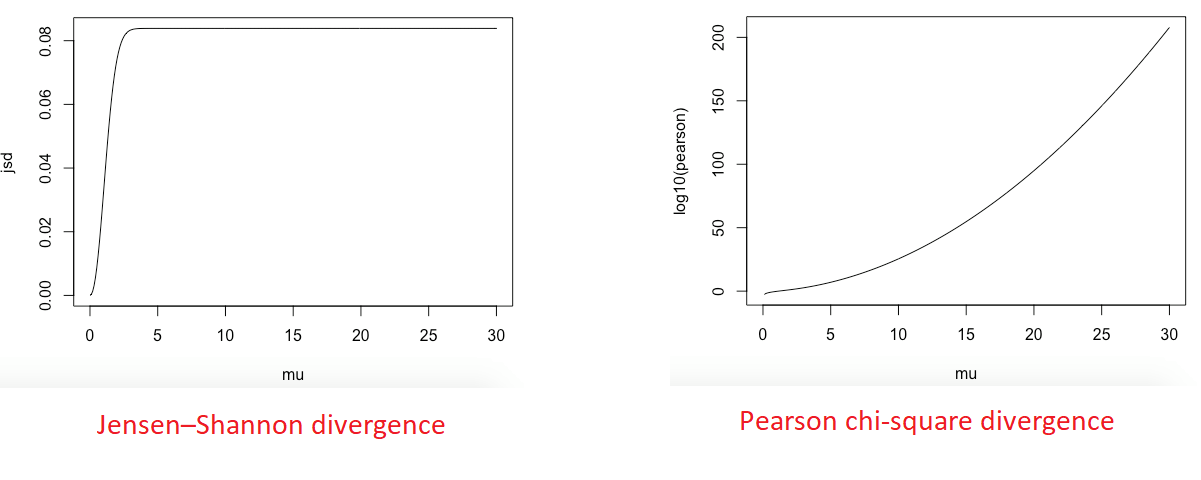
* Nhận xét khi $p_r$ và $p_g$ xa nhau:
    * Đạo hàm của $D_{JS}(p_r\mid\mid p_g)$ về 0 dẫn tới **vanishing gradient**
    * Vẫn có đạo hàm của $D_{JS}(p_r\mid\mid p_g)$ giúp tránh đc **vanishing gradient**
    * LSGAN giải quyết vấn đề **vanishing gradient** khi train Generator

# 3. Sử dụng
* Khi mà $z$ nằm cách xa đường phân chia, Discriminator ko quan tâm mà chỉ cần biết nó nằm bên phân chia nào, như vậy ko tốt
* Ta cần cho mô hình biết những điểm gần đường phân chia sẽ tốt hơn những điểm xa đường phân chia hơn
* LSGAN dùng L2 loss nên sẽ đánh giá đc những điểm gần sẽ tốt hơn và ko bị hiện tượng vanishing như hàm sigmoid

**Code chỉ cần thay loss function từ binary_crossentropy sang mse (mean square error)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random, math, os
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop
from tqdm.notebook import tqdm

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [4]:
# noise vector dimension
z_dim = 100

In [5]:
adam = Adam(learning_rate = 2e-4, beta_1 = 0.5)

# Generator
g = Sequential()
g.add(Dense(256, input_dim = z_dim, activation = LeakyReLU(alpha = 0.2)))
g.add(Dense(512, activation = LeakyReLU(alpha = 0.2)))
g.add(Dense(1024, activation = LeakyReLU(alpha = 0.2)))
g.add(Dense(X_train.shape[1], activation = 'sigmoid'))
g.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

# Discriminator
d = Sequential()
d.add(Dense(1024, input_dim = X_train.shape[1], activation = LeakyReLU(alpha = 0.2)))
d.add(Dropout(0.3))
d.add(Dense(512, activation = LeakyReLU(alpha = 0.2)))
d.add(Dropout(0.3))
d.add(Dense(256, activation = LeakyReLU(alpha = 0.2)))
d.add(Dropout(0.3))
d.add(Dense(1, activation = 'sigmoid'))
d.compile(loss = 'mse', optimizer = adam, metrics = ['accuracy'])

# Model
d.trainable = False
inputs = Input(shape = (z_dim,))
hidden = g(inputs)
outputs = d(hidden)
gan = Model(inputs, outputs)
gan.compile(loss = 'mse', optimizer = adam, metrics = ['accuracy'])

gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1486352   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [6]:
def plot_loss(losses, figsize = (10, 8)):
    g_loss = [v[0] for v in losses['G']]
    d_loss = [v[0] for v in losses['D']]
    
    plt.figure(figsize = figsize)
    plt.plot(g_loss, label = 'Generater loss')
    plt.plot(d_loss, label = 'Discriminator loss')
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def plot_generated(n_ex = 10, dim = (1, 10), figsize = (12, 2)):
    noise = np.random.normal(0, 1, size = (n_ex, z_dim))
    generated_images = g.predict(noise)
    generated_images = generated_images.reshape(n_ex, 28, 28)
    
    plt.figure(figsize = figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i], interpolation = 'nearest', cmap = 'gray_r')
        plt.axis('on')
    plt.tight_layout()
    plt.show()

In [7]:
losses = {'G':[], 'D':[]}

def train(epochs = 100, plt_frq = 10, BATCH_SIZE = 128):
    batch_count = int(X_train.shape[0] / BATCH_SIZE)
    print('Epochs:', epochs)
    print('Batch size:', BATCH_SIZE)
    print('Batches per epoch:', batch_count)
    
    for e in tqdm(range(1, epochs + 1), desc = 'Progress bar'):
        if e == 1 or e % plt_frq == 0:
            print('-' * 15, 'Epoch %d' % e, '-' * 15)
        for _ in tqdm(range(batch_count), leave = False, desc = 'Epoch %d' % e):
            # Random truth images from dataset
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size = BATCH_SIZE)] # (128, 784)
            # Noise from normal distribution
            noise = np.random.normal(0, 1, size = (BATCH_SIZE, z_dim)) # (128, 100)
            
            # Generator generate images from noise
            generated_images = g.predict(noise) # (128, 784)
            X = np.concatenate((image_batch, generated_images)) # (256, 784)
            # Labeling
            y = np.zeros(2 * BATCH_SIZE) # (256,)
            y[:BATCH_SIZE] = 0.9
            
            # Train Discriminator
            d.trainable = True
            d_loss = d.train_on_batch(X, y)
            
            # Train Generator
            noise = np.random.normal(0, 1, size = (BATCH_SIZE, z_dim))
            # While train Generater, labeling the images that are created by Generator are 1 -> try fool Discriminator
            y2 = np.ones(BATCH_SIZE)
            # Don't update Discriminator weights
            d.trainable = False
            g_loss = gan.train_on_batch(noise, y2)
        
        # Save loss function
        losses['G'].append(g_loss)
        losses['D'].append(d_loss)
        if e == 1 or e % plt_frq == 0:
            plot_generated()
    plot_loss(losses)

Epochs: 200
Batch size: 128
Batches per epoch: 468


Progress bar:   0%|          | 0/200 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------


Epoch 1:   0%|          | 0/468 [00:00<?, ?it/s]

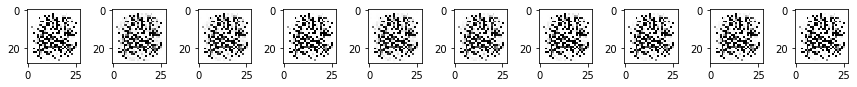

Epoch 2:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 10:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 11:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 12:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 13:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 14:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 15:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 16:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 17:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 18:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 19:   0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 20 ---------------


Epoch 20:   0%|          | 0/468 [00:00<?, ?it/s]

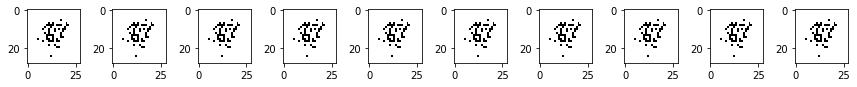

Epoch 21:   0%|          | 0/468 [00:00<?, ?it/s]

Epoch 22:   0%|          | 0/468 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
train(epochs = 200, plt_frq = 20, BATCH_SIZE = 128)